# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Read csv or exce file 

In [2]:
Data = pd.read_excel("Downloads/Data_to_be_prepared.xlsx")
Data.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/Data_to_be_prepared.xlsx'

In [8]:
modified = Data.drop(["Incident Group","Pot Sev Inj Type","Current Role Start Date"], axis = 1)  #droppin uneccessarily  variable 
modified.shape


(11185, 12)

In [9]:
modified.isnull().sum() # checking total null values

Sagar Case Type             1
Sagar / OSHA Recordable     0
Severe Injury Flag          0
Incident Name               0
Injury Cause                0
Desc. of Events             1
Injury Type                 0
Pot Sev Inj Category        0
Specific Work Area         22
Loc. Classific.             0
Body Part                   0
Department Name             0
dtype: int64

In [10]:
modified.dropna(inplace = True)     #dropping nan values


In [11]:
modified.isnull().sum()

Sagar Case Type            0
Sagar / OSHA Recordable    0
Severe Injury Flag         0
Incident Name              0
Injury Cause               0
Desc. of Events            0
Injury Type                0
Pot Sev Inj Category       0
Specific Work Area         0
Loc. Classific.            0
Body Part                  0
Department Name            0
dtype: int64

# label encoding 

In [12]:
df =pd.DataFrame(modified, columns = ['Sagar Case Type','Sagar / OSHA Recordable','Incident Name','Injury Cause','Desc. of Events','Injury Type','Pot Sev Inj Category','Pot Sev Inj Type','Specific Work Area','Loc. Classific.','Body Part','Department Name','Severe Injury Flag'
])

In [13]:
le =LabelEncoder()
df_encode = df.apply(le.fit_transform)           #performing label encoding
df_encode

,Sagar Case Type,Sagar / OSHA Recordable,Incident Name,Injury Cause,Desc. of Events,Injury Type,Pot Sev Inj Category,Pot Sev Inj Type,Specific Work Area,Loc. Classific.,Body Part,Department Name,Severe Injury Flag
0,4,0,9986,36,10909,19,11,0,1356,27,39,193,0
1,2,0,6631,79,9172,67,8,7433,6380,27,39,1073,0
2,2,0,3127,68,2829,67,8,7434,682,0,33,723,0
3,2,0,3681,114,9951,19,8,7435,2666,29,19,1004,0
4,2,0,2836,103,9114,46,8,7436,3167,0,23,439,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11180,3,1,9627,95,2855,46,8,3720,1789,27,20,597,0
11181,2,0,3614,85,7228,19,8,3721,1174,3,23,451,0
11182,2,0,7066,68,10643,41,8,3722,4354,0,22,268,0
11183,4,0,5049,0,9548,41,8,5579,6674,0,37,628,0


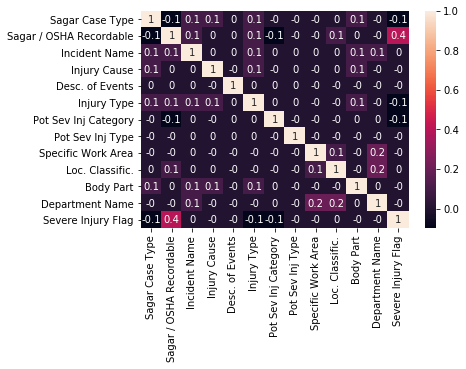

In [9]:
correlation = df_encode.corr().round(1)    # finding  correlation 
sns.heatmap(data=correlation, annot= True)

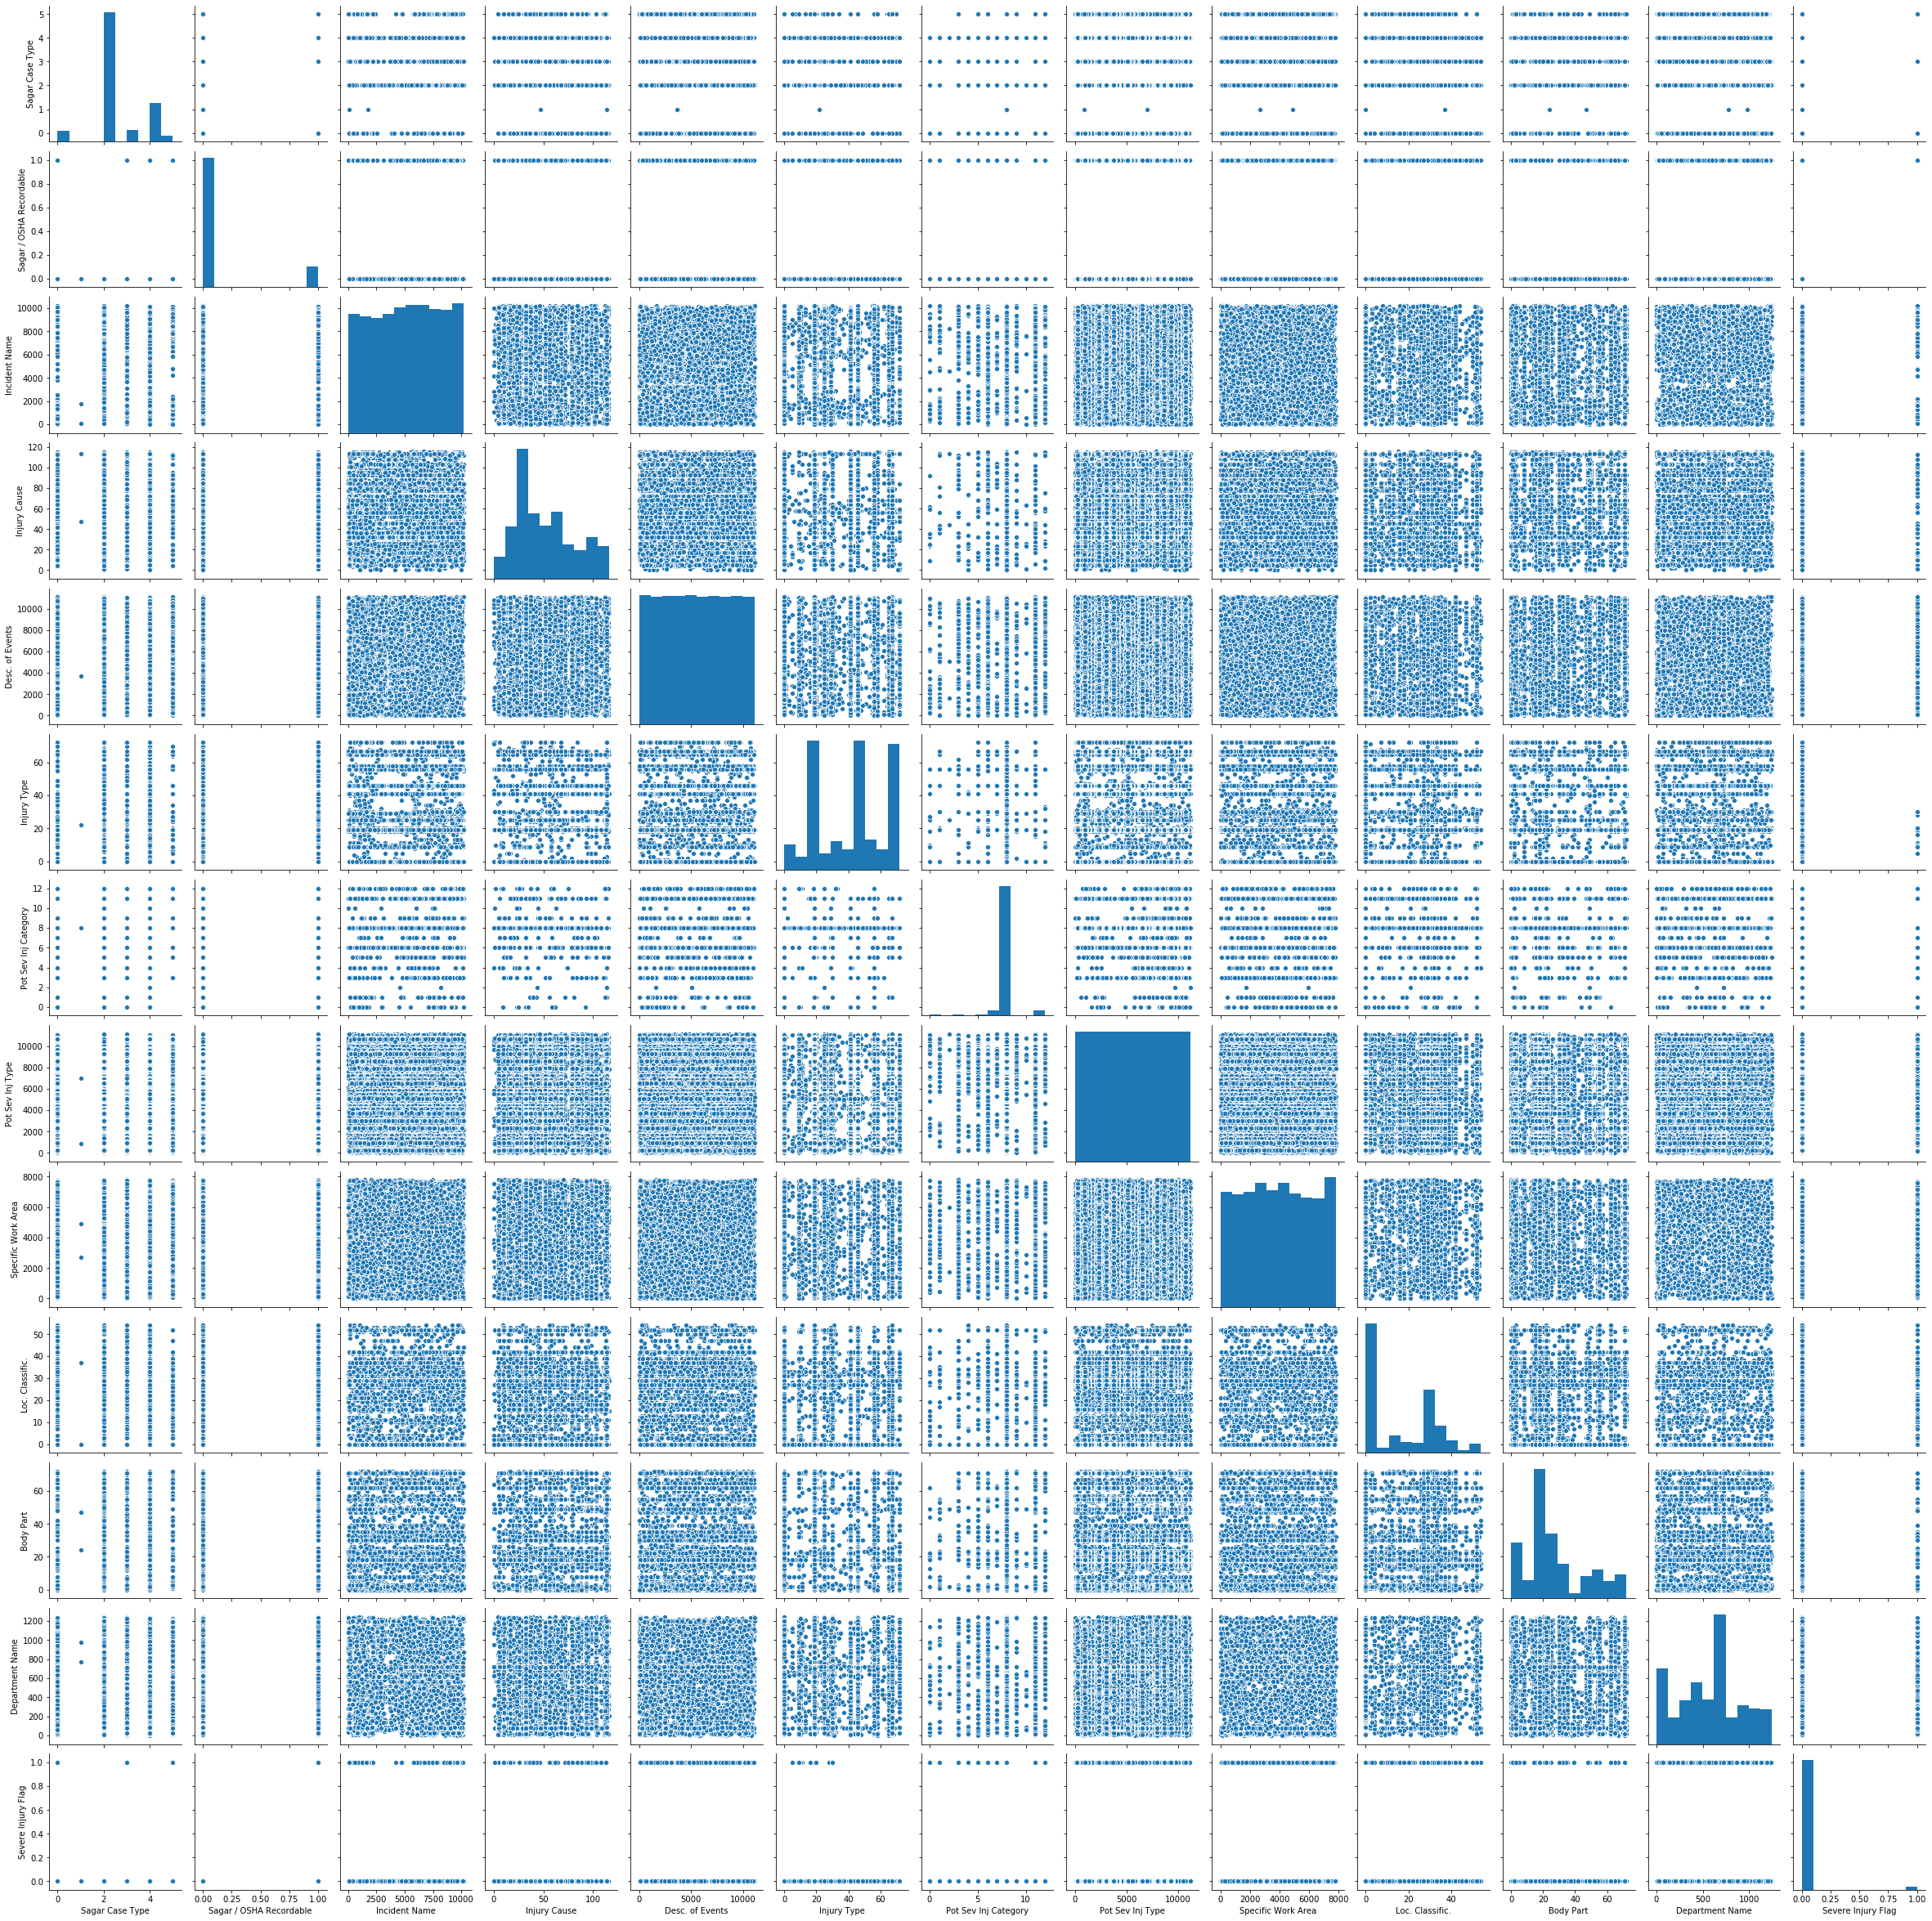

In [10]:
sns.pairplot(df_encode)     #visualization
plt.show()

In [14]:
Target = df_encode['Severe Injury Flag'] 
x = df_encode.drop(['Severe Injury Flag'],axis = 1 )       
Target
#defining x and Target

0        0
1        0
2        0
3        0
4        0
        ..
11180    0
11181    0
11182    0
11183    0
11184    0
Name: Severe Injury Flag, Length: 11161, dtype: int32

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(x,Target,test_size=0.25,random_state=42)

In [16]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [17]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)                                       #implementing Random Forest classification algo

RandomForestClassifier()

In [18]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores                                                                                            #Feature_importance

Injury Type                0.365243
Pot Sev Inj Category       0.125288
Sagar / OSHA Recordable    0.122069
Sagar Case Type            0.081212
Injury Cause               0.055877
Incident Name              0.054651
Pot Sev Inj Type           0.048039
Body Part                  0.035239
Specific Work Area         0.032600
Desc. of Events            0.030234
Department Name            0.027535
Loc. Classific.            0.022015
dtype: float64

# Prepare the data
Now we will prepare the data for a model training

In [19]:
X = pd.DataFrame(df_encode, columns = ['Injury Type','Sagar / OSHA Recordable','Pot Sev Inj Category','Sagar Case Type'])
Y =  pd.DataFrame(df_encode,columns = ['Severe Injury Flag'])


# Feature Scaling

In [20]:
#Scale 
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X),columns=X.columns)
X_scaled

,Injury Type,Sagar / OSHA Recordable,Pot Sev Inj Category,Sagar Case Type
0,-1.060873,-0.400083,2.750016,1.458060
1,1.282920,-0.400083,0.058126,-0.404952
2,1.282920,-0.400083,0.058126,-0.404952
3,-1.060873,-0.400083,0.058126,-0.404952
4,0.257511,-0.400083,0.058126,-0.404952
...,...,...,...,...
11156,0.257511,2.499480,0.058126,0.526554
11157,-1.060873,-0.400083,0.058126,-0.404952
11158,0.013366,-0.400083,0.058126,-0.404952
11159,0.013366,-0.400083,0.058126,1.458060


# K-Fold Cross Validation

In [21]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold



# Logistic ,Random Forest,Decision Tree
implementing Algorithms using Kfold cross Validation

In [22]:
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=1)
dt = DecisionTreeClassifier(random_state=1)
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [23]:
def train_model(model, X_scaled, Y, cv, scoring_metric='accuracy'):
    accuracy = cross_val_score(model, X, Y, cv=kf, scoring=scoring_metric)
    return accuracy.mean()

In [24]:
print('Random Forest Results:', train_model(rf, X_scaled, Y, kf))                    #Random Forest ALGO Results
cross_val_score(RandomForestClassifier(n_estimators=40),X_scaled,Y,cv=3)

c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\saini\appdata\local\programs\pytho

Random Forest Results: 0.9980290751147258


c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.99704381, 0.9983871 , 0.99811828])

In [25]:
print('logisticRegression Regression:', train_model(lr, X_scaled, Y, kf))                             #logistric Algo Results
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X_scaled,Y,cv=3)

c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

logisticRegression Regression: 0.9748227949284679


c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.97661919, 0.975     , 0.97446237])

In [26]:
print('DecisionTree Result:', train_model(dt, X_scaled, Y, kf))                     #Decision Tree ALGO results
cross_val_score(DecisionTreeClassifier(),X_scaled,Y,cv=3)   

DecisionTree Result: 0.999641697444812


array([0.99838753, 0.99919355, 1.        ])


# Random Forest using train_test split
We applied  Train Test split on scaled Variables

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.20,random_state=0)


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=  rf_classifier.predict(X_test)           
#put you values here and you will get the output for particular sample


<ipython-input-28-3bb84ac6e0c2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)


# Accuracy of model

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))

print(classification_report(y_test,prediction))

[[2180    1]
 [   2   50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2181
           1       0.98      0.96      0.97        52

    accuracy                           1.00      2233
   macro avg       0.99      0.98      0.99      2233
weighted avg       1.00      1.00      1.00      2233



# Random Forest Algorithm
Implementing Random Forest Algo. using train test Split without scalling 

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
X_train

<ipython-input-30-a7da2c314a19>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)


,Injury Type,Sagar / OSHA Recordable,Pot Sev Inj Category,Sagar Case Type
1152,56,0,8,2
6327,19,1,8,0
2462,46,0,8,2
6621,65,0,8,2
3358,9,0,0,2
...,...,...,...,...
4867,67,0,8,4
3269,19,0,9,2
9864,67,0,8,2
10820,19,0,8,4


In [ ]:
df['Sagar Case Type'].unique()

In [ ]:
df['Injury Type'].unique()

In [ ]:
df['Sagar / OSHA Recordable'].unique()

In [ ]:
df['Pot Sev Inj Category'].unique()

In [31]:
le =LabelEncoder()
le.fit_transform(df['Injury Type'])

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'All Other (Specific) Injuries, NOC': 0, 'All Other Cumulative Injury': 1, 'All Other Occ Disease - Illnesses': 2, 'All Other Occ Disease - Respiratory Cond': 3, 'All Other Occ Disease - Skin Diseases': 4, 'Amputation': 5, 'Angina Pectoris (Cond assc w/Heart Dis)': 6, 'Arthritis': 7, 'Asphyxiation - Injury': 8, 'Burn': 9, 'Burn or Scald (Heat)': 10, 'Burn-Chemical': 11, 'Cancer - All Other Illnesses': 12, 'Carpal Tunnel Syndrome - Injury': 13, 'Carpal Tunnel Syndrome - Other Illnesses': 14, 'Chipped / Broken Tooth': 15, 'Concussion (Brain, Cerebral)': 16, 'Conjunctivitis': 17, 'Contact Burn': 18, 'Contusion (Bruise, Skin Surface)': 19, 'Crushing': 20, "DeQuervain's Syndrome - Injury": 21, 'Death - All Other Illnesses': 22, 'Dermatitis': 23, 'Dislocation': 24, 'EHHSS_ILLC_INJ/Not assigned': 25, 'EHHSS_ILLC_OTHER_ILL/Not assigned': 26, 'Electric Shock': 27, 'Flash Burn': 28, 'Foreign Body (Eye)': 29, 'Fracture': 30, 'Hearing Loss or Impairment-Hearing Loss': 31, 'Heat Prostration': 32, 

In [1]:
le =LabelEncoder()
le.fit_transform(df['Pot Sev Inj Category'])

le_name_mapping2 = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping2)

NameError: name 'LabelEncoder' is not defined

In [2]:
le =LabelEncoder()
le.fit_transform(df['Sagar Case Type'])

le_name_mapping3 = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping3)

NameError: name 'LabelEncoder' is not defined

In [37]:
x = input('Enter the Injury type')
y = input('Enter Sagar / OSHA Recordable')
z = input('Enter Pot Sev Inj Category')
q = input('Enter Sagar Case Type ')
def cal_output(x,y,z,q):
    x_input = le_name_mapping
    y_input = {'No':0,'Yes':1}
    z_input = le_name_mapping2
    q_input = le_name_mapping3
    output  = {0:"No",1:"Yes"}
    predict = rf_classifier.predict([[x_input[x],y_input[y],z_input[z],q_input[q]]])
    print(output[predict[0]])
cal_output(x,y,z,q)



Enter the Injury typeFracture
Enter Sagar / OSHA RecordableYes
Enter Pot Sev Inj CategoryLifting Operation
Enter Sagar Case Type Days Away From Work Case
N


# Hyperparameter Tuning using Randomized Search cv method

In [34]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [35]:

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished
c:\users\saini\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [39]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'entropy'}

In [40]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [41]:

best_random_grid=rf_randomcv.best_estimator_

In [42]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[2179    2]
 [   2   50]]
Accuracy Score 0.9982086878638603
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2181
           1       0.96      0.96      0.96        52

    accuracy                           1.00      2233
   macro avg       0.98      0.98      0.98      2233
weighted avg       1.00      1.00      1.00      2233

